In [1]:
import sys
import csv
import io
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import ordpy

sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
df_res = pd.read_csv("all_result.csv", index_col=0)
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000
...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145


In [3]:
df_yres = pd.read_csv("year_res.csv")
df_yres

,V1,perm_ent3,perm_ent4,mse,mape,sym_test
0,Y1,0.697843,0.539401,5.165229e+04,0.026386,False
1,Y2,0.816579,0.705971,2.386951e+05,0.375479,False
2,Y3,0.000000,0.000000,8.157110e+04,0.028990,False
3,Y4,0.166740,0.144179,2.599992e+05,0.048794,False
4,Y5,0.478736,0.395644,9.007663e+04,0.032563,False
...,...,...,...,...,...,...
22995,Y22996,0.573126,0.449256,7.026910e+06,0.774407,False
22996,Y22997,0.783529,0.629254,1.140939e+07,1.495124,True
22997,Y22998,0.920599,0.721641,5.865997e+05,0.351883,True
22998,Y22999,0.846391,0.739619,2.357702e+07,2.094189,False


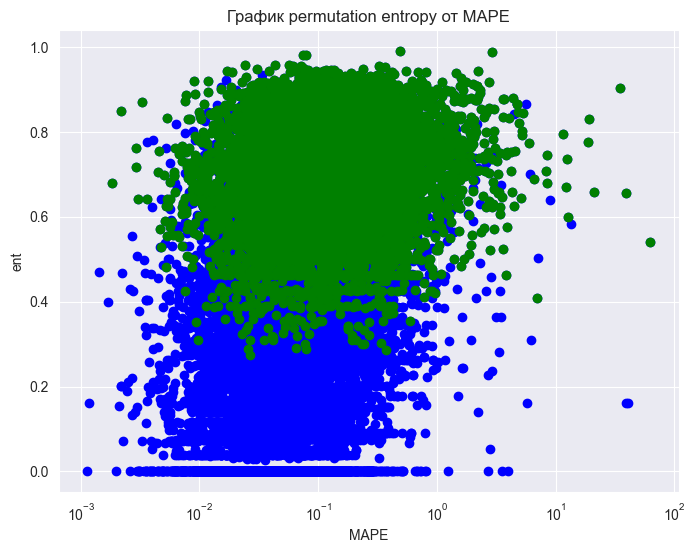

In [4]:
df_sorted = df_yres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

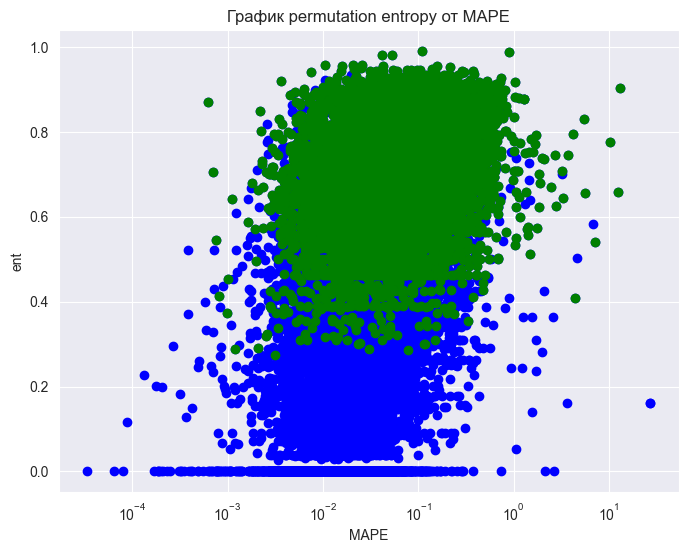

In [17]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mape'], df_year["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

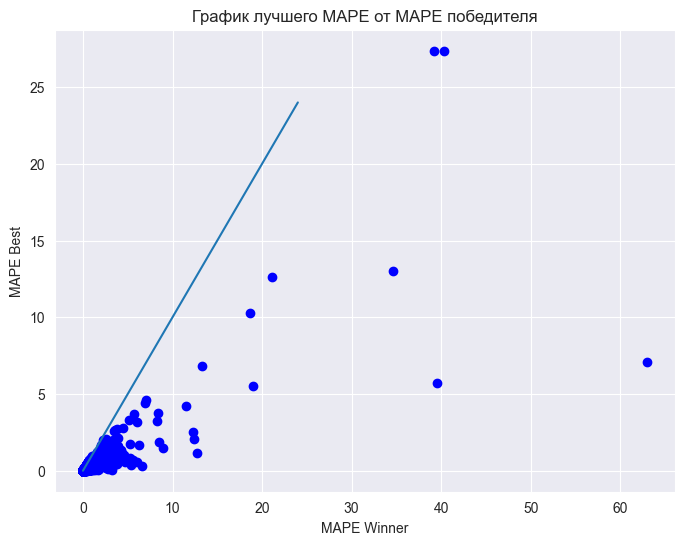

In [25]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_yres['mape'], df_year["mape"], color='blue')
plt.plot(range(0, 25), range(0, 25), label='y=x')
plt.title('График лучшего MAPE от MAPE победителя')
plt.xlabel('MAPE Winner')
plt.ylabel('MAPE Best')
#plt.semilogx()
plt.grid(True)
plt.show()

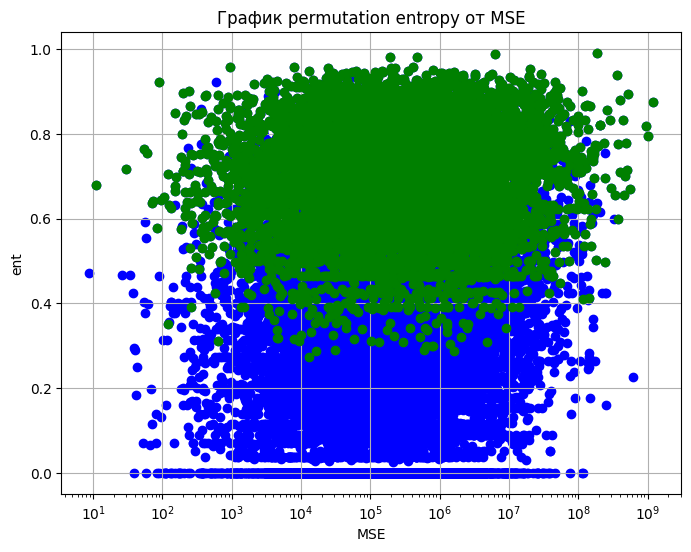

In [5]:
df_sorted = df_yres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [21]:
df_mres = pd.read_csv("month_res.csv")

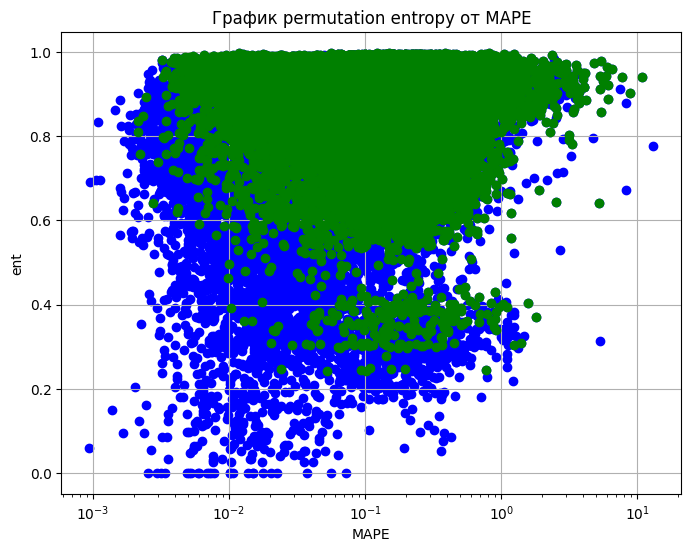

In [7]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

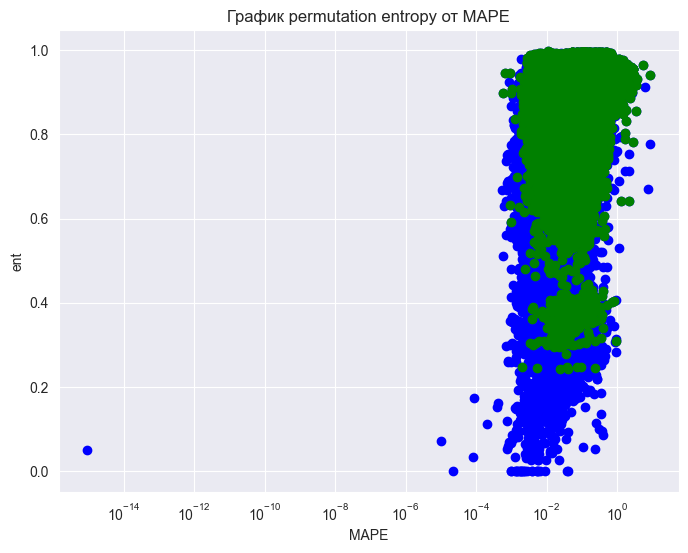

In [26]:
df_month = df_res[df_res['V1'].str.startswith('M')]
symmetry_ts = df_month.loc[df_month['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_month['mape'], df_month["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

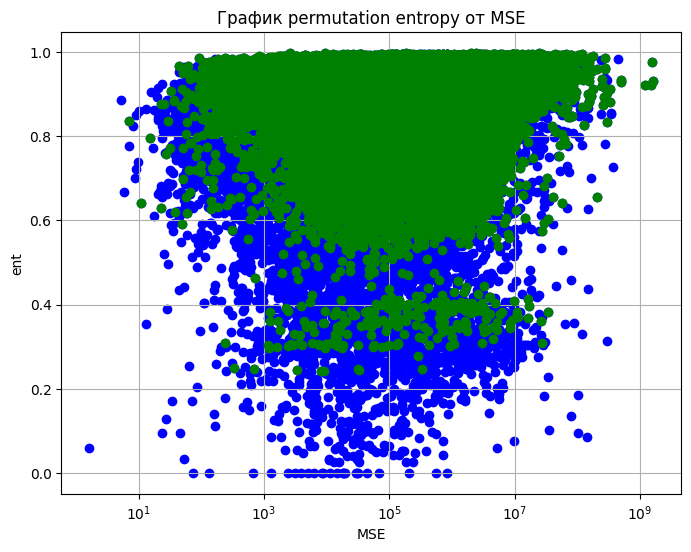

In [8]:
df_sorted = df_mres.sort_values(by='mse', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mse'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mse'], df_sorted["perm_ent3"], color='blue')
plt.title('График permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [15]:

df = []
symdf = []
for k in range(5, 101, 5):
    df_sorted = df_mres[df_mres["perm_ent4"] <= k/100]
    df_sorted = df_sorted[df_sorted["perm_ent4"] > (k-5)/100]
    df.append(df_sorted.loc[df_sorted['sym_test'] == False])
    symdf.append(df_sorted.loc[df_sorted['sym_test']])



In [16]:
df[0]

,V1,perm_ent4,mse,mape,sym_test
468,M469,0.044899,33306.567136,0.014782,False
2737,M2738,0.033855,11086.651458,0.008895,False
5802,M5803,0.032572,53.303057,0.003548,False
13500,M13501,0.031988,11054.668714,0.007634,False
28039,M28040,0.044215,145175.948466,0.033142,False
28040,M28041,0.044215,720421.164159,0.063141,False
30350,M30351,0.033855,30210.723933,0.014518,False
30395,M30396,0.026397,187504.350610,0.035860,False
30585,M30586,0.026397,15859.451735,0.010263,False
30593,M30594,0.026397,239117.829955,0.041537,False


In [37]:
df_sorted.loc[df_sorted['sym_test']].sort_values(by='mape', ascending=False)

,V1,perm_ent4,mse,mape,sym_test
128,M129,0.960461,8.186535e+06,6.499126,True
15169,M15170,0.965011,4.372507e+06,5.960623,True
17017,M17018,0.978104,1.051407e+08,5.397747,True
44205,M44206,0.974286,1.273893e+08,4.808400,True
33873,M33874,0.951162,4.922035e+06,4.132663,True
...,...,...,...,...,...
14835,M14836,0.985573,2.113122e+03,0.003938,True
24263,M24264,0.975236,1.504591e+03,0.003811,True
24698,M24699,0.976202,8.400357e+02,0.003748,True
24144,M24145,0.955569,1.031103e+03,0.003424,True


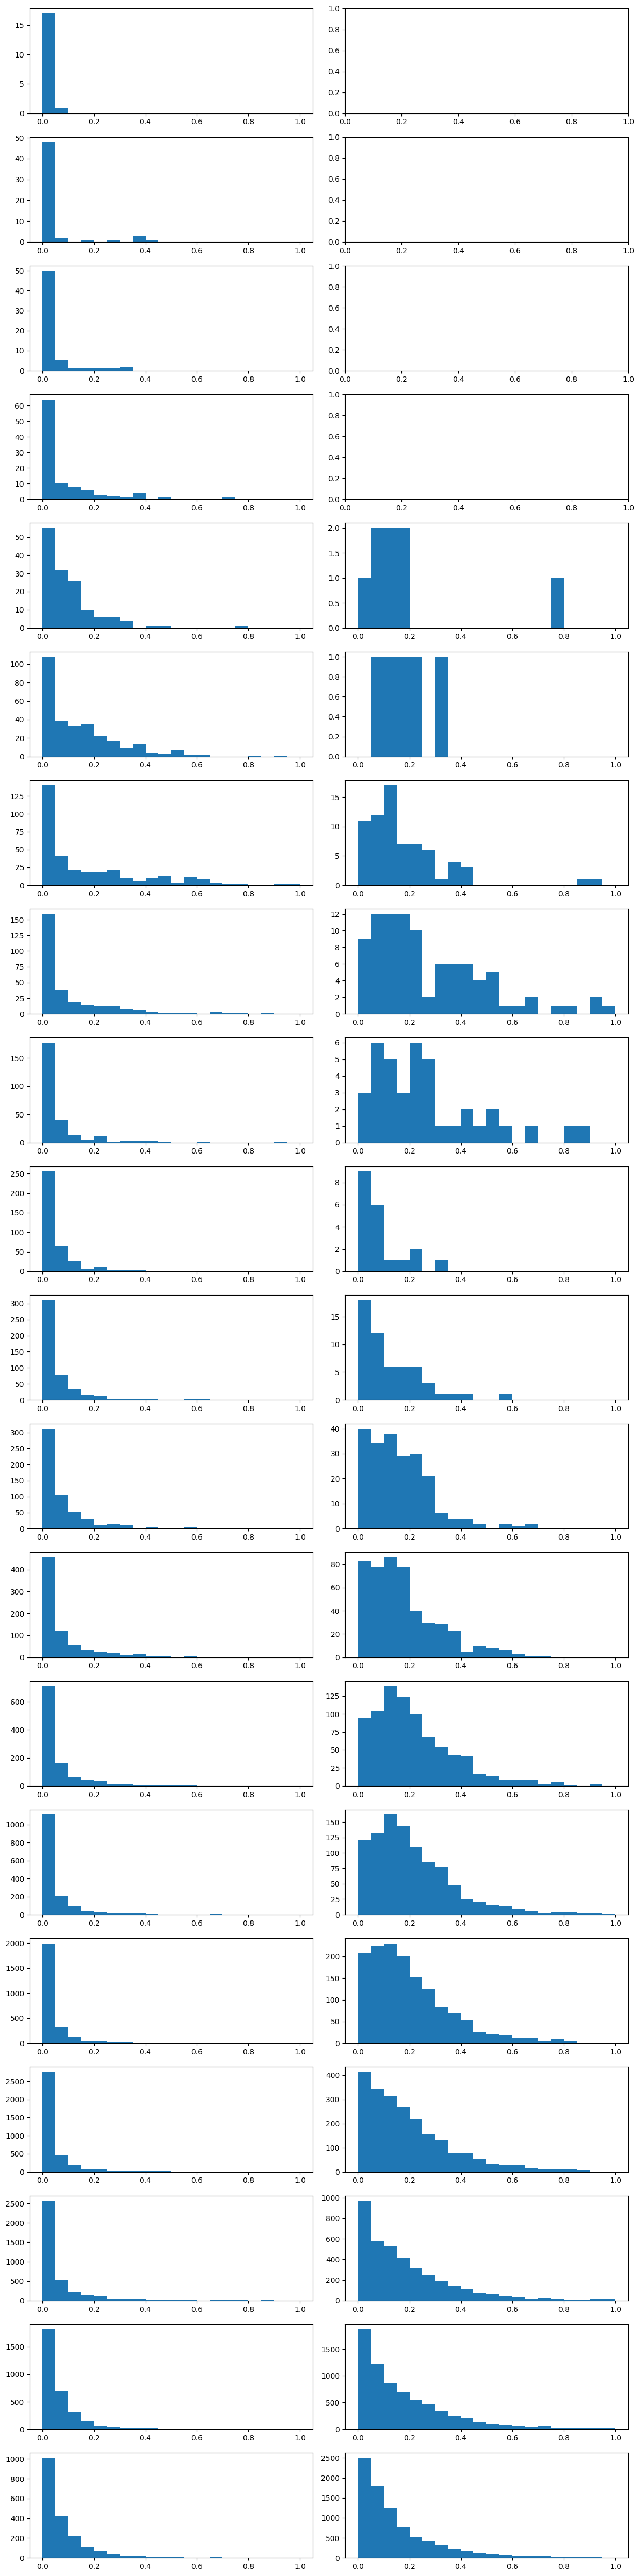

In [27]:
fig, axs = plt.subplots(20, 2, figsize=(12, 48))
for i in range(20):
    if not df[i].empty:
        axs[i, 0].hist(df[i]["mape"], bins = 20, range =(0, 1))
    if not symdf[i].empty:
        axs[i, 1].hist(symdf[i]["mape"], bins = 20, range = (0, 1))

plt.tight_layout()
plt.show()

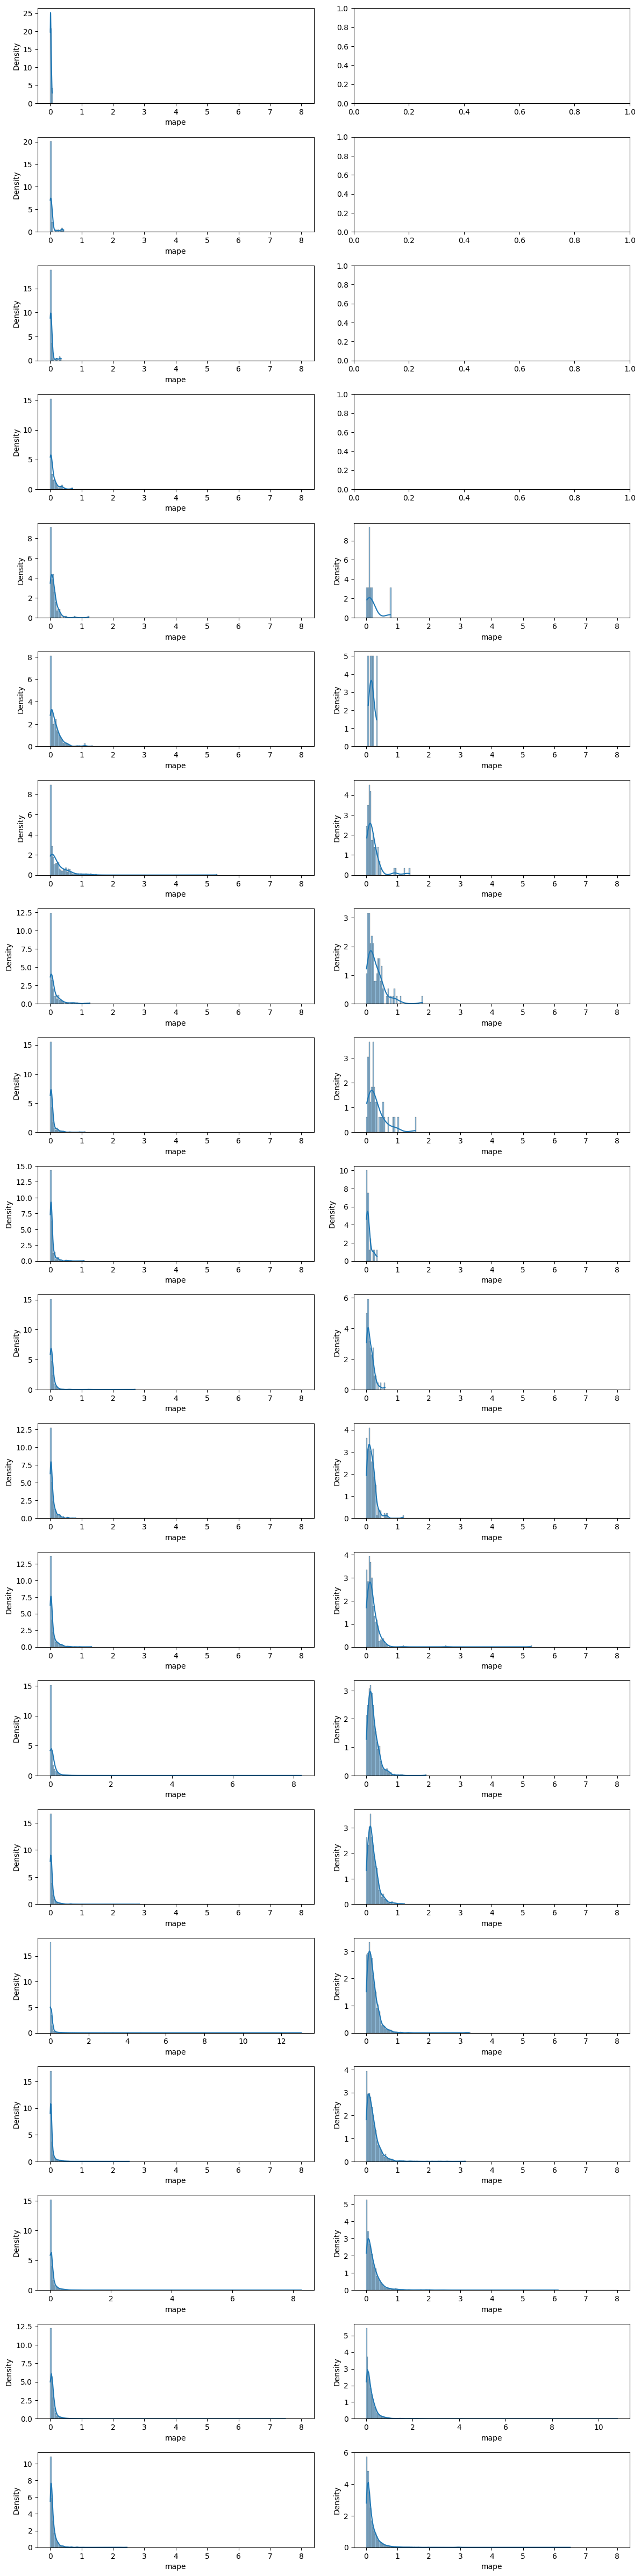

In [40]:
fig, axes = plt.subplots(20, 2, figsize=(12, 48))
for i in range(20):
    if not df[i].empty:
        sns.histplot(
        x=df[i]["mape"],
        ax=axes[i, 0],
        bins = 200,
        kde=True,
        stat="density",
        binrange=(0,8)
        )
    if not symdf[i].empty:
        sns.histplot(
        x=symdf[i]["mape"],
        ax=axes[i, 1],
        bins = 200,
        kde=True,
        stat="density",
        binrange=(0,8)
        )
fig.tight_layout(pad=1.0)
plt.show()

In [18]:
df_hres = pd.read_csv("hour_res.csv")
df_hres

,V1,perm_ent4,mse,mape,sym_test
0,H1,0.510222,684.690201,0.028253,True
1,H2,0.504348,75797.958582,0.092349,True
2,H3,0.565525,26970.966024,0.076970,True
3,H4,0.454969,233913.672187,0.076418,True
4,H5,0.475852,39110.915333,0.049885,False
...,...,...,...,...,...
409,H410,0.874486,370.591163,0.120214,False
410,H411,0.858007,209.673221,0.133872,False
411,H412,0.838310,107.068721,0.138424,True
412,H413,0.911229,97.899281,0.152070,True


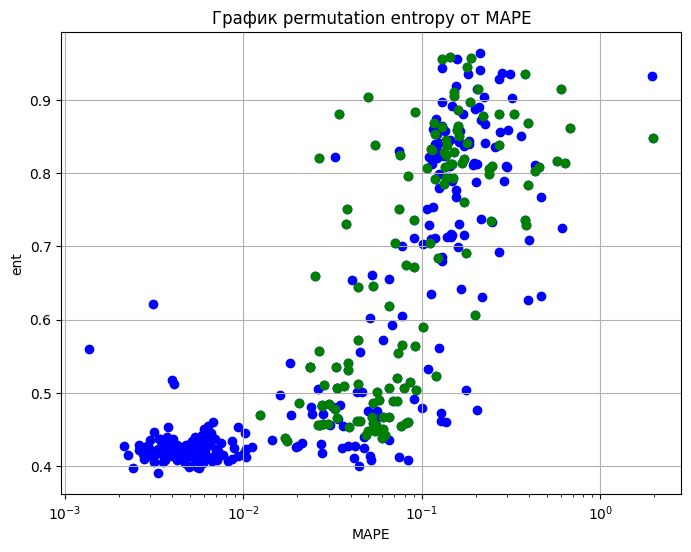

In [41]:
df_sorted = df_hres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

Посмотрим на временные ряды с большой энтропией и малым MAPE

In [3]:
df_mobs = df_mres[df_mres["perm_ent4"] > 0.95].sort_values(by="mape", ascending=True)
df_mobs

,V1,perm_ent4,mse,mape,sym_test
25470,M25471,0.957954,3.831005e+02,0.002730,False
25727,M25728,0.980173,6.678107e+02,0.003213,False
25715,M25716,0.973406,5.288606e+02,0.003220,False
25515,M25516,0.981272,1.006202e+03,0.003222,True
24841,M24842,0.962920,8.879841e+02,0.003249,False
...,...,...,...,...,...
33873,M33874,0.951162,4.922035e+06,4.132663,True
44205,M44206,0.974286,1.273893e+08,4.808400,True
17017,M17018,0.978104,1.051407e+08,5.397747,True
15169,M15170,0.965011,4.372507e+06,5.960623,True


In [4]:
symmetry_ts = df_mobs.loc[df_mobs["sym_test"]]

Mean:0.176 
Interquartile range:[0.043, 0.214]
95%:[0.01, 0.726]


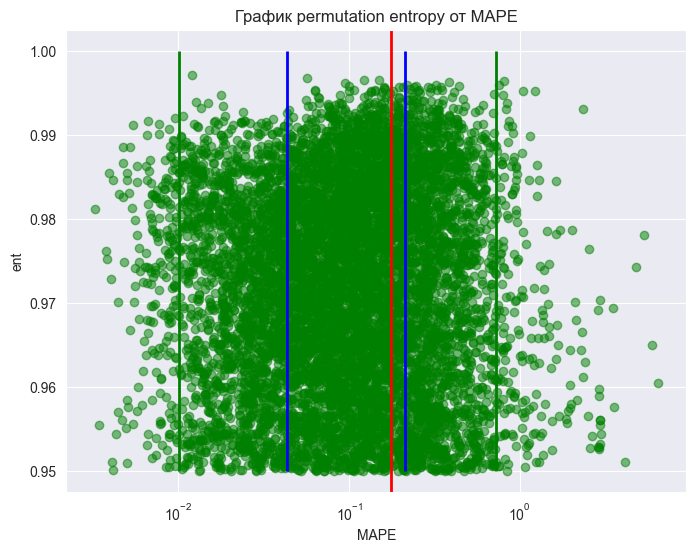

In [31]:
mean = np.mean(symmetry_ts['mape'])
q1 = np.percentile(symmetry_ts['mape'], 25)
q3 = np.percentile(symmetry_ts['mape'], 75)
ci_low, ci_high = np.percentile(symmetry_ts['mape'], [2.5, 97.5])

plt.figure(figsize=(8, 6))

plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', alpha=0.5)
plt.axvline(mean, color='r', linestyle='-', linewidth=2, label='Среднее')
plt.vlines([q1, q3], ymin=0.95, ymax=1, color='b', linewidth=2, label='Квартили')
plt.vlines([ci_low, ci_high], ymin=0.95, ymax=1, color='g', linewidth=2, label='95% Интервал')

plt.title('График permutation entropy от MAPE')
plt.semilogx()
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
print(f"Mean:{round(mean,3)} \nInterquartile range:[{round(q1,3)}, {round(q3,3)}]\n95%:[{round(ci_low,3)}, {round(ci_high,3)}]")
plt.show()


In [10]:
symmetry_ts.shape

(8630, 5)

In [11]:
df_mobs.shape

(10585, 5)

In [32]:
not_sim_df = df_mobs.loc[df_mobs['sym_test'] == False]

Mean:0.086 
Interquartile range:[0.022, 0.106]
95%:[0.006, 0.38]


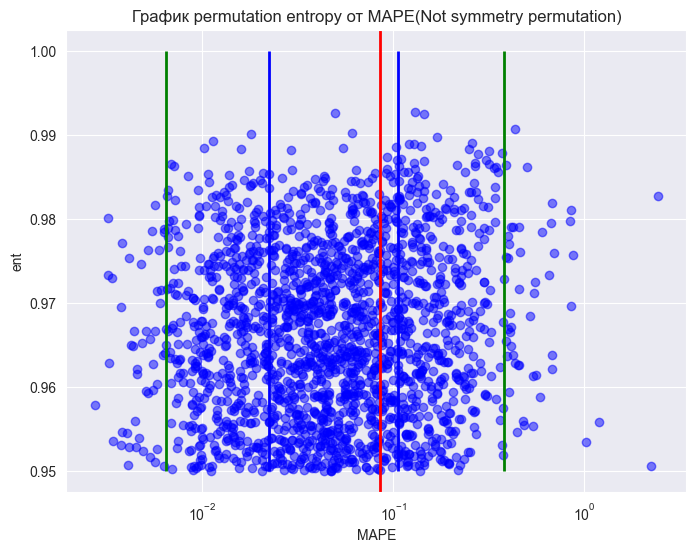

In [34]:
mean = np.mean(not_sim_df['mape'])
q1 = np.percentile(not_sim_df['mape'], 25)
q3 = np.percentile(not_sim_df['mape'], 75)
ci_low, ci_high = np.percentile(not_sim_df['mape'], [2.5, 97.5])

plt.figure(figsize=(8, 6))

plt.scatter(not_sim_df['mape'], not_sim_df['perm_ent4'], color='blue', alpha=0.5)
plt.axvline(mean, color='r', linestyle='-', linewidth=2, label='Среднее')
plt.vlines([q1, q3], ymin=0.95, ymax=1, color='b', linewidth=2, label='Квартили')
plt.vlines([ci_low, ci_high], ymin=0.95, ymax=1, color='g', linewidth=2, label='95% Интервал')

plt.title('График permutation entropy от MAPE(Not symmetry permutation)')
plt.semilogx()
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
print(f"Mean:{round(mean,3)} \nInterquartile range:[{round(q1,3)}, {round(q3,3)}]\n95%:[{round(ci_low,3)}, {round(ci_high,3)}]")
plt.show()

In [17]:
input_file = "../src/M4-methods/Dataset/Train/Monthly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_m = pd.read_csv(output_file, index_col=0)
df_m

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
V1,,,,,,,,,,,,,,,,,,,,,
M1,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,2650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M3,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,2795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M4,7264.0,7215.0,7022.0,7040.0,6966.0,6984.0,7025.0,7082.0,6956.0,7014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M5,4210.0,4290.0,4250.0,4320.0,4320.0,4330.0,4320.0,4260.0,4220.0,4260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M47996,9964.0,7212.0,7858.0,8493.0,8203.0,8362.0,7238.0,7357.0,8642.0,8833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47997,1696.6,1627.2,1465.4,1672.8,1760.1,1974.8,1733.7,1898.0,1952.4,1684.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47998,5900.0,6000.0,6280.0,6100.0,5410.0,5320.0,5130.0,5330.0,5810.0,5840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_m.loc[df_mobs["V1"]]

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
V1,,,,,,,,,,,,,,,,,,,,,
M25471,3816.108188,3826.890432,3825.109266,3820.250909,3815.681236,3801.305366,3785.515825,3796.328613,3808.870748,3798.149007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M25728,5525.923280,5592.205480,5593.985350,5555.785420,5514.454110,5523.130580,5579.035680,5594.060780,5635.320840,5586.149850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M25716,4373.184870,4402.769170,4401.580280,4379.258130,4348.774580,4362.075530,4348.277140,4344.144530,4340.785930,4339.133190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M25516,6825.011870,6880.940560,6877.266040,6869.415210,6842.886590,6844.838440,6823.982470,6825.387700,6833.007050,6818.636500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M24842,6535.651300,6616.837070,6626.826490,6616.865440,6594.762170,6614.100210,6587.349570,6595.403950,6619.404600,6606.115620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M33874,6758.100000,6550.340000,6512.850000,6479.610000,6398.760000,6752.510000,5998.650000,6724.290000,5866.510000,6435.510000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M44206,1080.000000,1080.000000,1100.000000,1270.000000,1420.000000,1980.000000,1280.000000,1290.000000,1400.000000,1560.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M17018,1080.000000,1080.000000,1100.000000,1270.000000,1420.000000,1980.000000,1280.000000,1290.000000,1400.000000,1560.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
ts = df_m.loc[df_mobs["V1"].iloc[0]]
ts

V2       3816.108188
V3       3826.890432
V4       3825.109266
V5       3820.250909
V6       3815.681236
            ...     
V2791            NaN
V2792            NaN
V2793            NaN
V2794            NaN
V2795            NaN
Name: M25471, Length: 2794, dtype: float64

<Axes: >

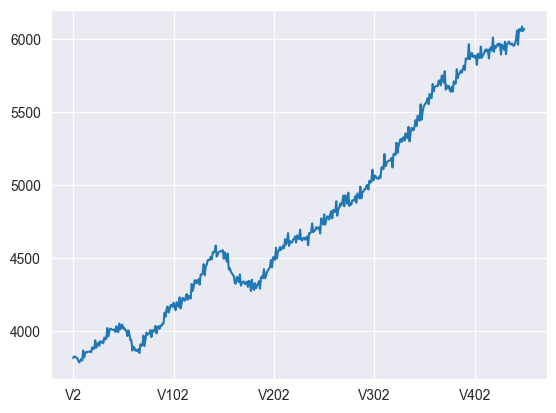

In [40]:
ts.plot()

<BarContainer object of 24 artists>

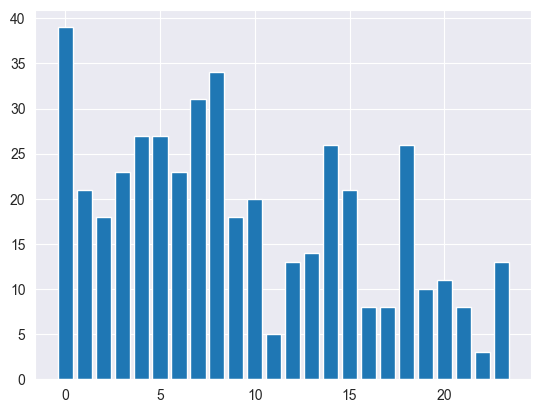

In [108]:
perm = count_permutation(ts.dropna(), 4)
plt.bar(range(len(perm)),perm)

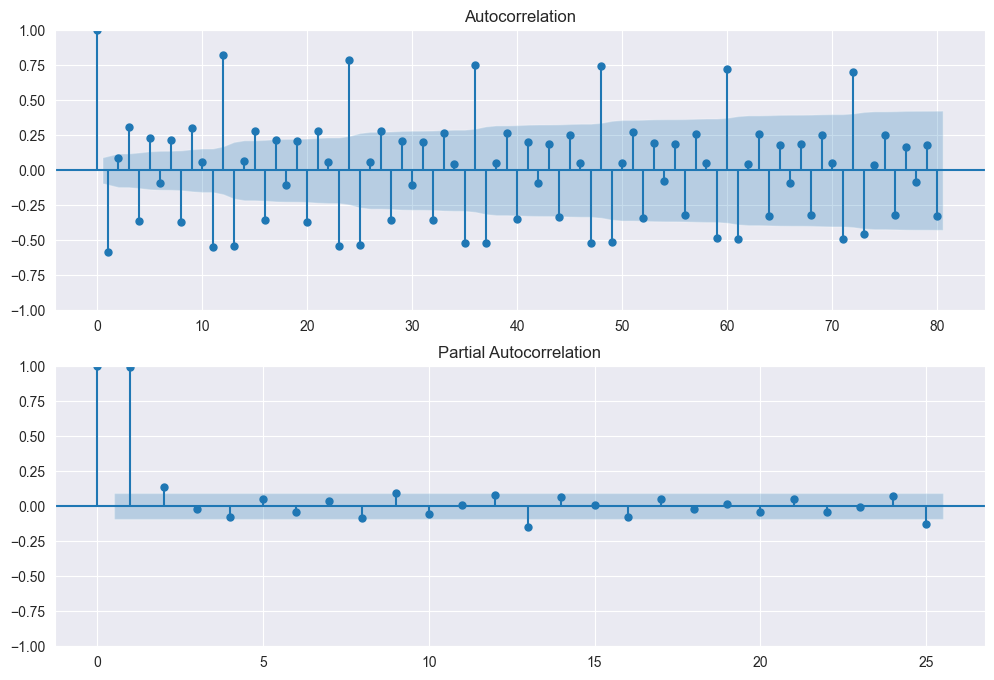

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.diff(periods = 1).dropna().values, lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.dropna(), lags=25, ax=ax2)

In [68]:
model = sm.tsa.statespace.SARIMAX(endog=ts.dropna().values,order=(1,1,0),seasonal_order=(0,0,1,12))
res = model.fit()
print(res.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  450
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood               -2130.830
Date:                              Mon, 19 Feb 2024   AIC                           4267.659
Time:                                      00:09:33   BIC                           4279.980
Sample:                                           0   HQIC                          4272.516
                                              - 450                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4778      0.041    -11.709      0.000      -0.558      -0.398
ma.S.L12       0.51

In [103]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Monthly-test.csv", index_col=0)
print("SARIMA: ",mean_absolute_percentage_error(y_test.loc[df_mobs["V1"].iloc[0]], res.predict(450,467, dynamic=True)))
print("Method: ", df_mobs['mape'].iloc[0])

SARIMA:  0.003769027847898464
Method:  0.0027298560651695


<Axes: >

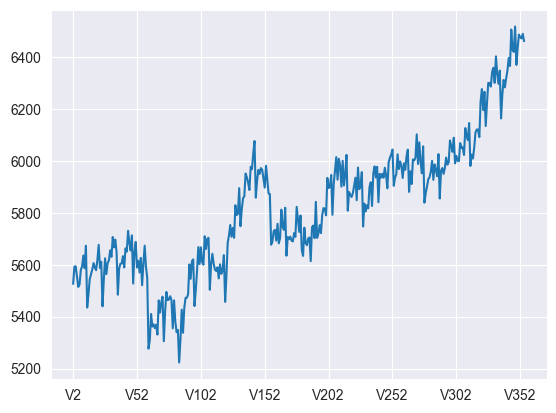

In [104]:
df_m.loc[df_mobs["V1"].iloc[1]].plot()

<BarContainer object of 24 artists>

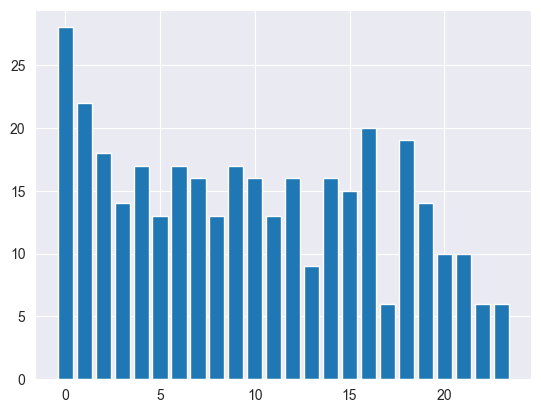

In [109]:
perm = count_permutation(df_m.loc[df_mobs["V1"].iloc[1]].dropna(), 4)
plt.bar(range(len(perm)),perm)

<Axes: >

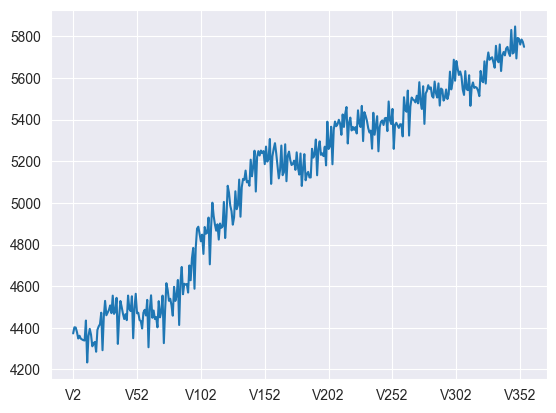

In [106]:
df_m.loc[df_mobs["V1"].iloc[2]].plot()

<BarContainer object of 24 artists>

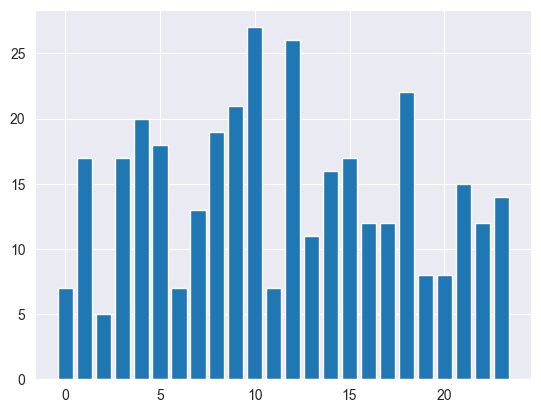

In [110]:
perm = count_permutation(df_m.loc[df_mobs["V1"].iloc[2]].dropna(), 4)
plt.bar(range(len(perm)),perm)

In [115]:
symmetry_ts

,V1,perm_ent4,mse,mape,sym_test
25515,M25516,0.981272,1.006202e+03,0.003222,True
24144,M24145,0.955569,1.031103e+03,0.003424,True
24698,M24699,0.976202,8.400357e+02,0.003748,True
24263,M24264,0.975236,1.504591e+03,0.003811,True
14835,M14836,0.985573,2.113122e+03,0.003938,True
...,...,...,...,...,...
33873,M33874,0.951162,4.922035e+06,4.132663,True
44205,M44206,0.974286,1.273893e+08,4.808400,True
17017,M17018,0.978104,1.051407e+08,5.397747,True
15169,M15170,0.965011,4.372507e+06,5.960623,True


In [116]:
ts_sym = df_m.loc[symmetry_ts["V1"].iloc[1]]
ts_sym

V2       7502.86984
V3       7522.90222
V4       7473.80081
V5       7709.31486
V6       7599.04697
            ...    
V2791           NaN
V2792           NaN
V2793           NaN
V2794           NaN
V2795           NaN
Name: M24145, Length: 2794, dtype: float64

<Axes: >

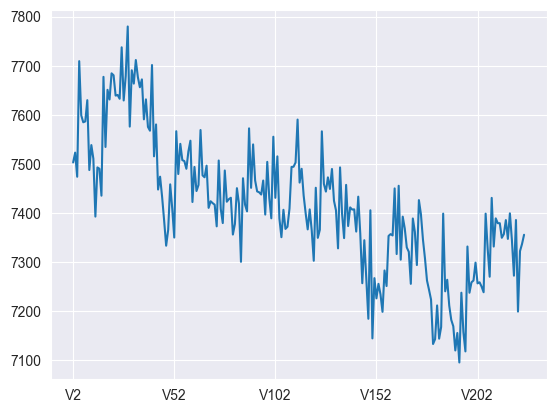

In [117]:
ts_sym.plot()

<BarContainer object of 24 artists>

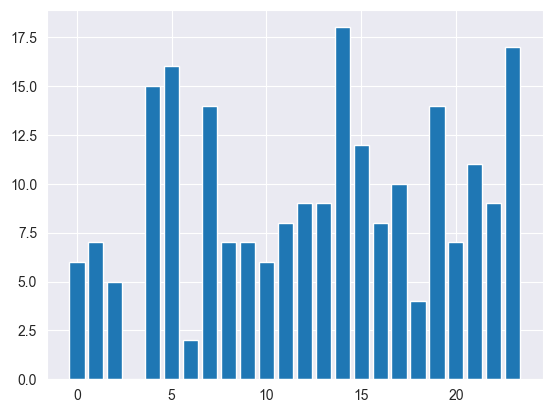

In [118]:
perm = count_permutation(ts_sym.dropna(), 4)
plt.bar(range(len(perm)),perm)

In [121]:
multiply_equals_test(perm, alpha=0.03)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([0.17020225, 0.94092696, 0.61210123, 0.08104695, 0.96183683,
        0.0700109 , 0.17020225, 0.71636705, 0.74806687, 0.17333393,
        0.89491863, 0.96183683]),
 0.002535048613836688,
 0.0025)

Узнали, что и Арима хорошо предсказывает эти ряды. Они в основном сезонные и трендовые. Почему-то "симметричное распределение" не сильно симметрично

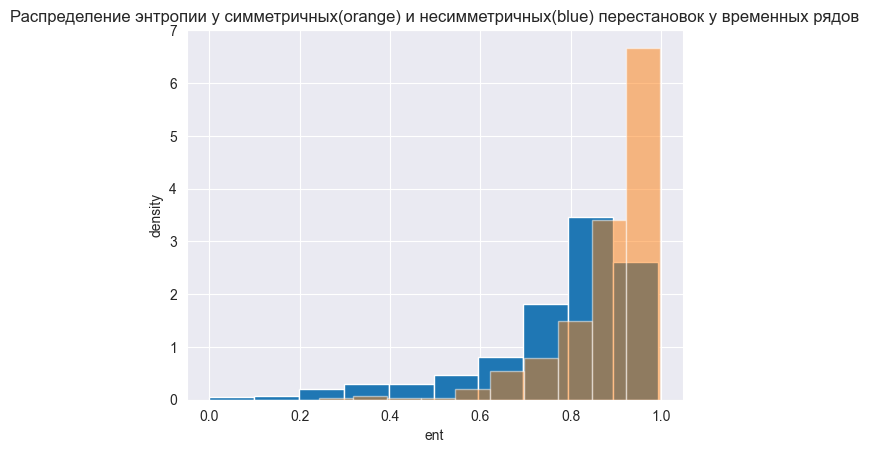

In [14]:
plt.hist(df_mres[df_mres["sym_test"] == False]["perm_ent4"], density=True)
plt.hist(df_mres[df_mres["sym_test"]]["perm_ent4"], density=True, alpha = 0.5)
plt.title('Распределение энтропии у симметричных(orange) и несимметричных(blue) перестановок у временных рядов')
plt.xlabel('ent')
plt.ylabel('density')
plt.grid(True)
plt.show()

Добавим рассчет weighted permutation entropy для изучаемых рядов(месячный интервал).

In [20]:
w_perm_ent4 = []
for index, row in df_m.iterrows():
    if int(index[1:])%100 == 0:
        print(int(index[1:]))
    ts = row.dropna()
    w_perm_ent4.append(ordpy.weighted_permutation_entropy(ts, 4, normalized = True))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

ValueError: Length of values (48000) does not match length of index (414)

In [22]:
df_mres["w_perm_ent4"] = w_perm_ent4

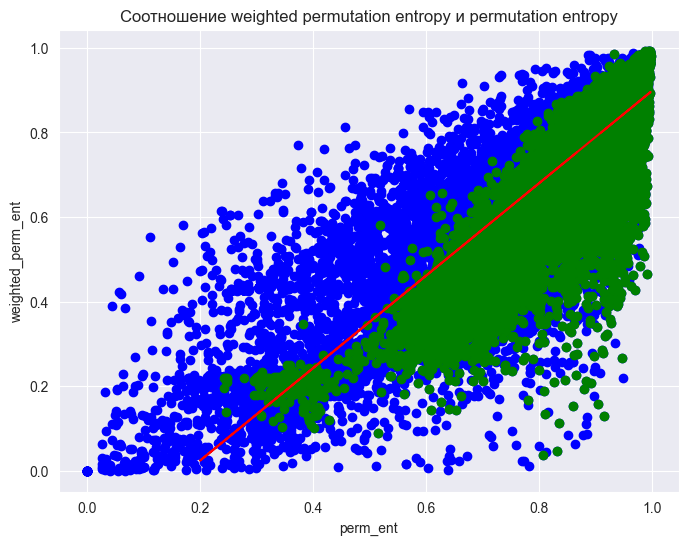

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df_mres['perm_ent4'], df_mres["w_perm_ent4"], color='blue')
slope, intercept = np.polyfit(x = df_mres['perm_ent4'], y = df_mres["w_perm_ent4"], deg= 1)
plt.plot(df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'], slope*df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'] + intercept, color='red', label='Корреляционная прямая')
plt.scatter(df_mres.loc[df_mres["sym_test"]]['perm_ent4'], df_mres.loc[df_mres["sym_test"]]["w_perm_ent4"], color='green')
plt.title('Соотношение weighted permutation entropy и permutation entropy')
plt.xlabel('perm_ent')
plt.ylabel('weighted_perm_ent')
plt.grid(True)
plt.show()

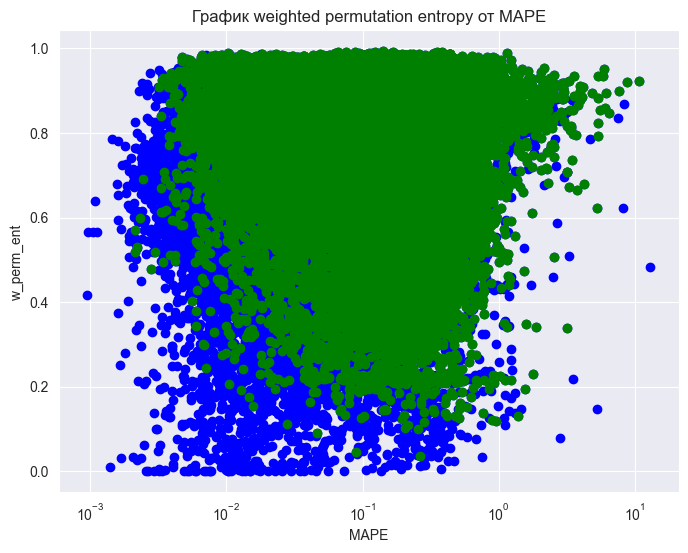

In [32]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График weighted permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('w_perm_ent')
plt.grid(True)
plt.show()

Нет такой корреляции между большой весовой энтропией и симметричностью, как в обычной энтропии перестановок. Это же мы наблюдаем, сравнивая две энтропии: симметричные временные ряды могут иметь высокую обычную энтропию, но маленькую весовую.

Посмотрим как много несимметричных рядов имеют такие же значения энтропий.

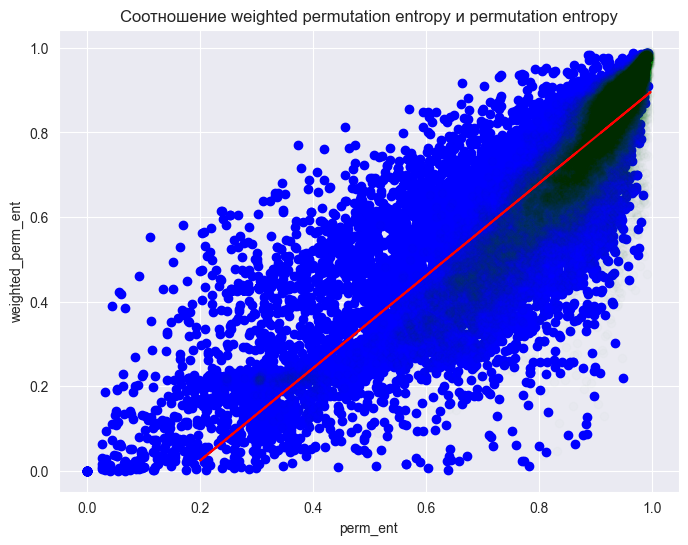

In [38]:
plt.figure(figsize=(8, 6))
slope, intercept = np.polyfit(x = df_mres['perm_ent4'], y = df_mres["w_perm_ent4"], deg= 1)
plt.plot(df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'], slope*df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'] + intercept, color='red', label='Корреляционная прямая')
plt.scatter(df_mres.loc[df_mres["sym_test"] == False]['perm_ent4'], df_mres.loc[df_mres["sym_test"]==False]["w_perm_ent4"], color='blue')
plt.scatter(df_mres.loc[df_mres["sym_test"] == True]['perm_ent4'], df_mres.loc[df_mres["sym_test"]==True]["w_perm_ent4"], color='green', alpha=0.01)
plt.title('Соотношение weighted permutation entropy и permutation entropy')
plt.xlabel('perm_ent')
plt.ylabel('weighted_perm_ent')
plt.grid(True)
plt.show()

In [39]:
df_mres

,V1,perm_ent4,mse,mape,sym_test,w_perm_ent4
0,M1,0.909662,7.874106e+05,0.153035,False,0.814357
1,M2,0.989495,1.248459e+05,0.198594,True,0.975544
2,M3,0.932202,5.120518e+04,0.014831,False,0.799853
3,M4,0.921449,3.714089e+04,0.027042,True,0.819323
4,M5,0.923284,4.278665e+03,0.012104,True,0.883636
...,...,...,...,...,...,...
47995,M47996,0.886897,3.571599e+06,0.533812,True,0.827608
47996,M47997,0.902506,9.650026e+04,0.431220,False,0.779903
47997,M47998,0.917699,3.928648e+04,0.034677,True,0.784790
47998,M47999,0.922063,2.404732e+04,0.030232,True,0.815742
